In [1]:
import os
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
import librosa

In [2]:
def get_features(path):

    signal, sr = librosa.load(path)

    mfcc = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=13)
    delta_mfcc = librosa.feature.delta(mfcc)
    delta2_mfcc = librosa.feature.delta(mfcc, order=2)

    mfccs = np.hstack((
                    np.mean(mfcc, axis=1),
                    np.std(mfcc, axis=1),
                    np.max(mfcc, axis=1),
                    np.median(mfcc, axis=1),
                    np.min(mfcc, axis=1),
                    skew(mfcc, axis=1),
                    kurtosis(mfcc, axis=1)
                ))
    delta_mfccs = np.hstack((
                    np.mean(delta_mfcc, axis=1),
                    np.std(delta_mfcc, axis=1),
                    np.max(delta_mfcc, axis=1),
                    np.median(delta_mfcc, axis=1),
                    np.min(delta_mfcc, axis=1),
                    skew(delta_mfcc, axis=1),
                    kurtosis(delta_mfcc, axis=1)
                ))
    delta2_mfccs = np.hstack((
                    np.mean(delta2_mfcc, axis=1),
                    np.std(delta2_mfcc, axis=1),
                    np.max(delta2_mfcc, axis=1),
                    np.median(delta2_mfcc, axis=1),
                    np.min(delta2_mfcc, axis=1),
                    skew(delta2_mfcc, axis=1),
                    kurtosis(delta2_mfcc, axis=1)
                ))

    extracted_features = np.hstack((mfccs, delta_mfccs, delta2_mfccs))
    return extracted_features

In [3]:
# dataset_path = '../data/wav'
dataset_path = '../data/wav_split_sample'

data = []

for i, (root, _, files) in enumerate(os.walk(dataset_path)):
    files.sort()
    for f in files:
        technique = f.split('_')[0]
        file_path = dataset_path + '/' + f
        features = get_features(file_path)
        features = np.append(features, [technique, f])
        data.append(features)
    # if root is not dataset_path:
    #     if not files:
    #         tone_type = root.split('/')[-1]
    #         # print(f'TONE TYPE: {tone_type}')
    #     else:
    #         subtechnique = root.split('/')[-1]
    #         technique = subtechnique.split('_')[0]
    #         # print(f'TECHNIQUE: {technique}')
    #         # print(f'SUBTECHNIQUE: {subtechnique}')
    #         for file in files:
    #             file_path = os.path.join(root, file)
    #             features = get_features(file_path)
    #             featurses = np.append(features, [technique, file_path])
    #             data.append(features)
print('Done!!!')

Done!!!


In [4]:
columns = []
names = ['mfcc', 'delta_mfcc', 'delta2_mfcc']
stats = ['mean', 'std', 'max', 'median', 'min', 'skew', 'kurtosis']
file_desc = ['technique','file']

for name in names:
    for stat in stats:
        for i in range(13):
            col = f'{stat}_{name}_{i+1}'
            columns = np.append(columns, col)

columns = np.append(columns, file_desc)
columns.shape

(275,)

In [5]:
df = pd.DataFrame(data, columns=columns)
df

,mean_mfcc_1,mean_mfcc_2,mean_mfcc_3,mean_mfcc_4,mean_mfcc_5,mean_mfcc_6,mean_mfcc_7,mean_mfcc_8,mean_mfcc_9,mean_mfcc_10,...,kurtosis_delta2_mfcc_6,kurtosis_delta2_mfcc_7,kurtosis_delta2_mfcc_8,kurtosis_delta2_mfcc_9,kurtosis_delta2_mfcc_10,kurtosis_delta2_mfcc_11,kurtosis_delta2_mfcc_12,kurtosis_delta2_mfcc_13,technique,file
0,-218.84694,86.81607,-51.84921,55.75788,-36.838966,-1.2738166,-25.367903,-13.5294695,-17.419874,-11.295274,...,-1.3386278,-1.7792838,-1.764172,-1.6684377,-1.8158064,-1.8029685,-1.9046292,-1.133988,bending,bending_up_whole_1_1.wav
1,-252.66904,81.9901,-47.8681,56.606754,-33.919907,7.6535797,-22.220734,-17.5641,-25.35023,-13.4374075,...,-1.9063942,-0.7111263,-1.7595763,-1.7542081,-1.3334488,1.4874015,-1.8409225,-0.032402992,bending,bending_up_whole_2_1.wav
2,-250.90128,56.77972,-47.70276,50.883003,-44.211445,-1.6806709,-33.99672,-26.632442,-16.369343,-3.762543,...,0.21673512,0.94823337,-0.98609495,0.8075805,-1.8453026,-1.5187328,-1.793363,0.3179667,hamming,hamming_whole_step_1_1.wav
3,-265.76428,69.707016,-41.595173,54.576717,-39.914696,5.1588726,-28.77237,-17.501478,-25.740204,-11.13976,...,-1.7127274,-1.7433404,-1.832233,-1.8823328,-1.9095594,-1.7689748,-1.7773163,-1.7590983,hamming,hamming_whole_step_2_1.wav
4,-171.92993,177.89772,-47.25373,60.37567,-27.280334,6.3716865,-17.744514,-7.4960775,-5.7304964,0.50984174,...,-1.3286442,-1.0811257,-1.7135916,-1.8230137,-0.7810836,-1.74023,-1.7876741,-1.1023704,mute,mute_1_1.wav
5,-178.90503,173.24323,-43.702946,53.700607,-21.58375,5.908013,-10.315294,-6.4816685,-4.7371135,-0.72148025,...,-1.6293298,-1.8528775,-1.8901205,-1.8444887,-1.7728902,-0.84310675,-1.8737533,-0.114789724,mute,mute_2_1.wav
6,-174.18451,166.76561,-50.459927,56.00855,-24.160439,11.577605,-14.005915,-1.3546561,-7.976836,2.6209466,...,-1.3153142,-0.32129002,-1.947642,-1.9026482,-1.6507813,-0.69765997,1.668056,-0.483433,normal,normal_1_1.wav
7,-149.0495,165.08339,-47.892517,58.085186,-21.581646,9.573054,-15.679747,-6.0630984,-11.011153,-2.6546214,...,-1.8645568,-1.091222,1.9460306,-1.87207,3.2973309,2.1247764,-1.7795596,-1.1067883,normal,normal_2_1.wav
8,-229.42401,98.25939,-49.30093,55.048687,-28.042206,12.151862,-14.595781,-14.143987,-19.198711,-10.642881,...,-1.7948492,1.0870352,0.8193474,0.96823454,-1.9120159,-1.2472228,-1.8317252,-1.7568729,pulling,pulling_whole_step_1_1.wav
9,-239.12857,105.10275,-47.263706,55.117516,-25.31652,10.826395,-9.229997,-7.2455363,-11.876444,-6.864854,...,-1.5975614,-1.1785799,-1.6097223,-1.7678865,-1.8757617,-0.64981246,-1.1703469,-1.9144055,pulling,pulling_whole_step_2_1.wav


In [6]:
# df.to_csv('../data/gpt.csv', index=False)
df.to_csv('../data/gpt_split_sample.csv', index=False)

In [7]:
gpt_sample = pd.read_csv('../data/gpt_split_sample.csv')

In [8]:
gpt_sample

,mean_mfcc_1,mean_mfcc_2,mean_mfcc_3,mean_mfcc_4,mean_mfcc_5,mean_mfcc_6,mean_mfcc_7,mean_mfcc_8,mean_mfcc_9,mean_mfcc_10,...,kurtosis_delta2_mfcc_6,kurtosis_delta2_mfcc_7,kurtosis_delta2_mfcc_8,kurtosis_delta2_mfcc_9,kurtosis_delta2_mfcc_10,kurtosis_delta2_mfcc_11,kurtosis_delta2_mfcc_12,kurtosis_delta2_mfcc_13,technique,file
0,-218.84694,86.816070,-51.849210,55.757880,-36.838966,-1.273817,-25.367903,-13.529469,-17.419874,-11.295274,...,-1.338628,-1.779284,-1.764172,-1.668438,-1.815806,-1.802968,-1.904629,-1.133988,bending,bending_up_whole_1_1.wav
1,-252.66904,81.990100,-47.868100,56.606754,-33.919907,7.653580,-22.220734,-17.564100,-25.350230,-13.437408,...,-1.906394,-0.711126,-1.759576,-1.754208,-1.333449,1.487402,-1.840923,-0.032403,bending,bending_up_whole_2_1.wav
2,-250.90128,56.779720,-47.702760,50.883003,-44.211445,-1.680671,-33.996720,-26.632442,-16.369343,-3.762543,...,0.216735,0.948233,-0.986095,0.807581,-1.845303,-1.518733,-1.793363,0.317967,hamming,hamming_whole_step_1_1.wav
3,-265.76428,69.707016,-41.595173,54.576717,-39.914696,5.158873,-28.772370,-17.501478,-25.740204,-11.139760,...,-1.712727,-1.743340,-1.832233,-1.882333,-1.909559,-1.768975,-1.777316,-1.759098,hamming,hamming_whole_step_2_1.wav
4,-171.92993,177.897720,-47.253730,60.375670,-27.280334,6.371687,-17.744514,-7.496078,-5.730496,0.509842,...,-1.328644,-1.081126,-1.713592,-1.823014,-0.781084,-1.740230,-1.787674,-1.102370,mute,mute_1_1.wav
5,-178.90503,173.243230,-43.702946,53.700607,-21.583750,5.908013,-10.315294,-6.481668,-4.737114,-0.721480,...,-1.629330,-1.852877,-1.890121,-1.844489,-1.772890,-0.843107,-1.873753,-0.114790,mute,mute_2_1.wav
6,-174.18451,166.765610,-50.459927,56.008550,-24.160439,11.577605,-14.005915,-1.354656,-7.976836,2.620947,...,-1.315314,-0.321290,-1.947642,-1.902648,-1.650781,-0.697660,1.668056,-0.483433,normal,normal_1_1.wav
7,-149.04950,165.083390,-47.892517,58.085186,-21.581646,9.573054,-15.679747,-6.063098,-11.011153,-2.654621,...,-1.864557,-1.091222,1.946031,-1.872070,3.297331,2.124776,-1.779560,-1.106788,normal,normal_2_1.wav
8,-229.42401,98.259390,-49.300930,55.048687,-28.042206,12.151862,-14.595781,-14.143987,-19.198711,-10.642881,...,-1.794849,1.087035,0.819347,0.968235,-1.912016,-1.247223,-1.831725,-1.756873,pulling,pulling_whole_step_1_1.wav
9,-239.12857,105.102750,-47.263706,55.117516,-25.316520,10.826395,-9.229997,-7.245536,-11.876444,-6.864854,...,-1.597561,-1.178580,-1.609722,-1.767886,-1.875762,-0.649812,-1.170347,-1.914405,pulling,pulling_whole_step_2_1.wav


In [9]:
for idx in range(14):
    mfcc = np.zeros((13,7))
    for j in range(7):
        i = j + 0
        mfcc[:,j] = gpt_sample.iloc[idx,i*13:i*13+13]
    dmfcc = np.zeros((13,7))
    for j in range(7):
        i = j + 7
        dmfcc[:,j] = gpt_sample.iloc[idx,i*13:i*13+13]
    d2mfcc = np.zeros((13,7))
    for j in range(7):
        i = j + 14
        d2mfcc[:,j] = gpt_sample.iloc[idx,i*13:i*13+13]
    dframe = np.vstack((mfcc, dmfcc, d2mfcc))
    dframe = pd.DataFrame(dframe)
    title = df['file'][idx].split('.')[0]
    dframe.to_csv(f'csv/{idx}_{title}.csv', index=False, float_format='%.2f')

In [11]:
gpt_complete = pd.read_csv('../data/gpt.csv')
gpt_split = pd.read_csv('../data/gpt_split.csv')

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
ds = pd.value_counts(gpt_complete['technique'])
dt = pd.value_counts(gpt_split['technique'])
df = pd.DataFrame([ds]).append(pd.DataFrame([dt]))
df = df.reindex(sorted(df.columns), axis=1)
df = df.reset_index(drop=True)
df

,bending,hamming,mute,normal,pulling,slide,trill
0,1253,567,378,1974,511,1134,630
1,874,559,367,3659,515,1061,622


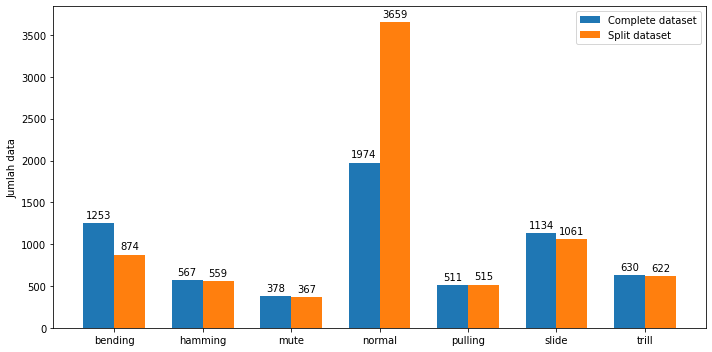

In [121]:
x = np.arange(7)  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(x - width/2, df.iloc[0], width, label='Complete dataset')
rects2 = ax.bar(x + width/2, df.iloc[1], width, label='Split dataset')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Jumlah data')
ax.set_xticks(x)
ax.set_xticklabels(df.columns)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.savefig('distribusi_data.jpg', bbox_inches='tight', dpi=300)